In [1]:

import pandas as pd
import numpy as np

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import importlib
import script.fractional_differencing as fd
import testAndVerification
from script.testAndVerification import tsplot, test_stationarity
importlib.reload(testAndVerification)

<Figure size 640x480 with 1 Axes>

<module 'testAndVerification' from 'D:\\4\\Traffic-Simulation\\script\\testAndVerification.py'>

In [4]:
# data=pd.read_csv("data_for_0p01s_time_slot.csv",index_col=0)['byteRates0p01']
data=pd.read_csv("../dataset/"+"data_for_0p1s_time_slot.csv",index_col=0)

In [3]:
print(data.__len__())
data.index=data.index.map(lambda x:float('%.2f' % x))

6000


In [5]:
# data=pd.read_csv("data_for_0p01s_time_slot.csv",index_col=0)['byteRates0p01']
data_train=data.iloc[:5000]

data_test=data.iloc[4800:]

In [6]:
tsplot(data_train,title="0.01 time slot",lags=30)


NameError: name 'data_train' is not defined

(<matplotlib.axes._subplots.AxesSubplot at 0x1e8e1ea1b00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e8e1b9ab00>)

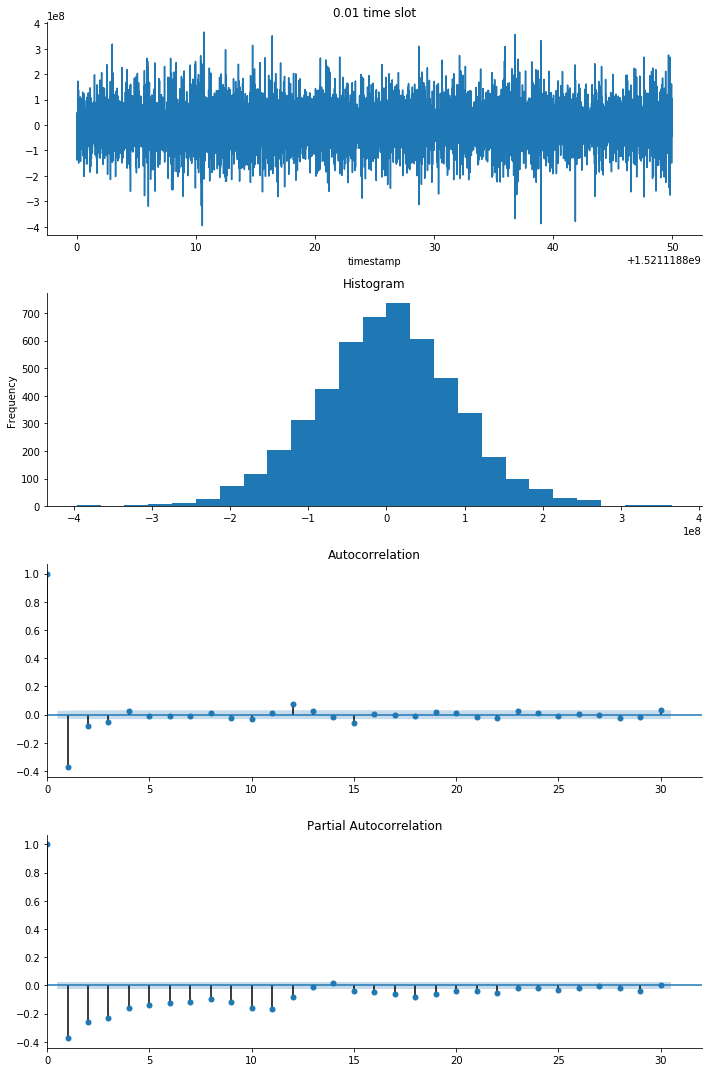

In [7]:
data_train_diff=data_train.diff().dropna()
tsplot(data_train_diff,title="0.01 time slot",lags=30)


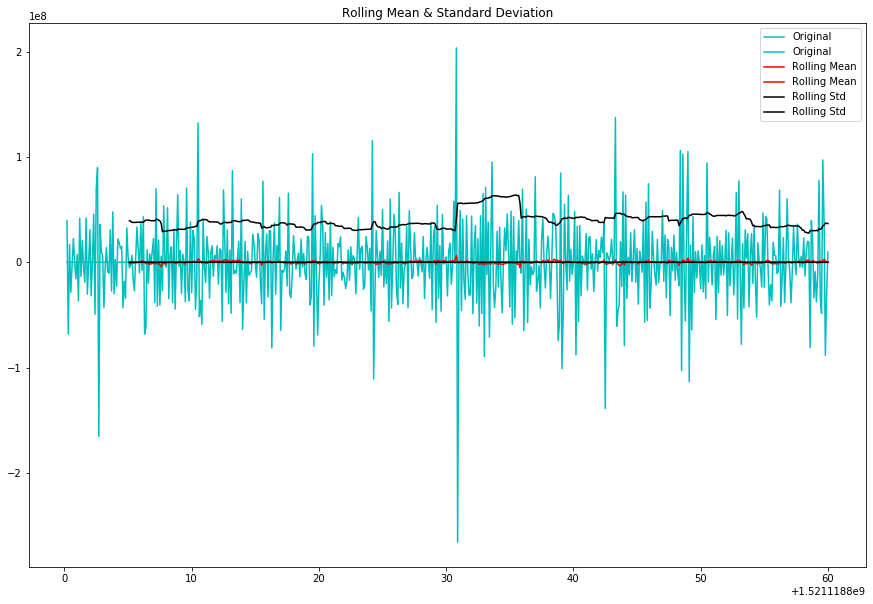

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

<Figure size 432x288 with 0 Axes>

In [7]:
test_stationarity(data_train.diff(1))

In [ ]:
arima0 = ARIMA(data_train, order=(3,1,3))
model_results = arima0.fit()

In [74]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.byteRates0p01   No. Observations:                 4999
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -97578.499
Method:                       css-mle   S.D. of innovations       72596694.555
Date:                Mon, 20 Jan 2020   AIC                         195172.998
Time:                        12:48:16   BIC                         195225.134
Sample:                             1   HQIC                        195191.272
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -4.19e+04   4.48e+04     -0.935      0.350    -1.3e+05    4.59e+04
ar.L1.D.byteRates0p01     0.0855      0.211      0.405      0.685      -0.328       0.499
ar.L2.D.byteRates0p01     0.5900      0.169      3.487      0.000       0.258       0.922
ar.L3.D.byteRates0p01    -0.1638      0.044     -3.699      0.000      -0.251      -0.077
ma.L1.D.byteRates0p01    -0.8052      0.212     -3.805      0.000      -1.220      -0.390
ma.L2.D.byteRates0p01    -0.7057      0.232     -3.041      0.002      -1.160      -0.251
ma.L3.D.byteRates0p01     0.5311      0.173      3.067      0.002       0.192       0.871
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1851           +0.0000j            1.1851            0.5000
AR.2            1.6339           +0.0000j            1.6339            0.0000
AR.3            3.1520           +0.0000j            3.1520            0.0000
MA.1           -1.2100           +0.0000j            1.2100            0.5000
MA.2            1.0342           +0.0000j            1.0342            0.0000
MA.3            1.5046           +0.0000j            1.5046            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
# 

In [75]:
pred_train=model_results.predict(start=4000,end=6000,dynamic=True,typ='levels')
pred_train.index=data.index[3999:6000]

c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


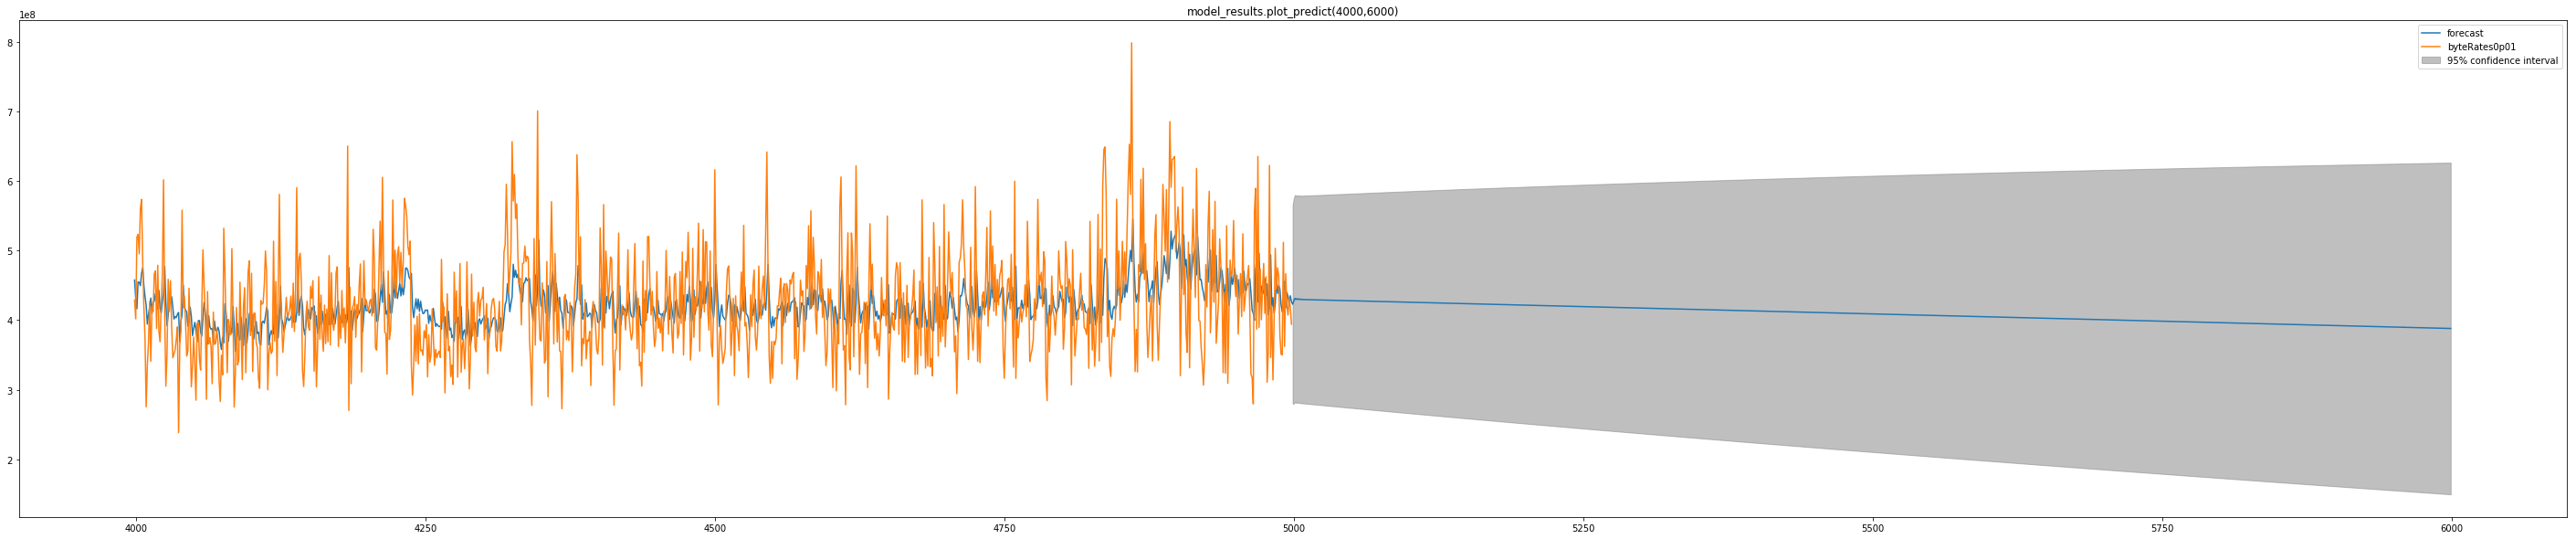

In [76]:
# plt.plot(data_test)
axe=model_results.plot_predict(4000,6000)
axe.set_size_inches(50,10)
axe.get_axes()[0].set_title("model_results.plot_predict(4000,6000)")
plt.savefig("prediction with confidence interval")


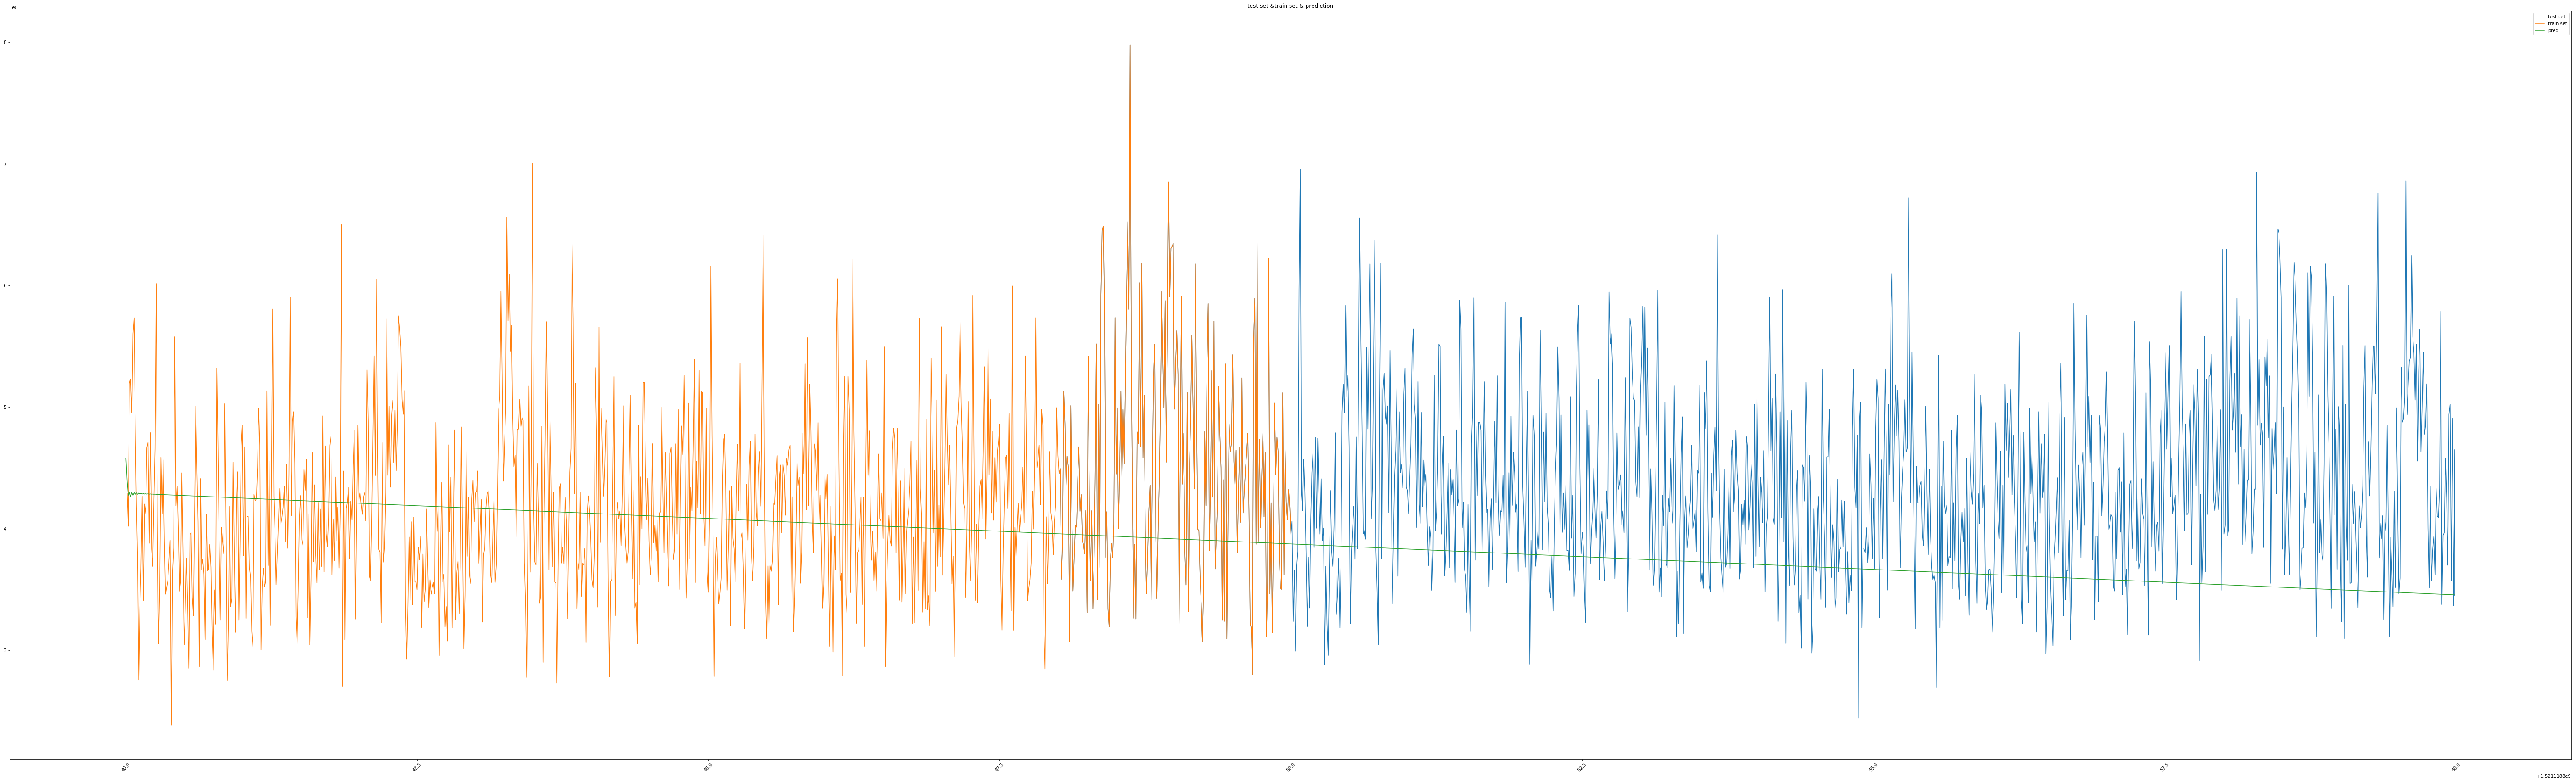

In [77]:
plt.figure(figsize=(100, 30))
plt.xticks(rotation=45)

plt.plot(data_test)
plt.plot(data_train.iloc[4000:])
plt.plot(pred_train)
plt.legend(["test set","train set","pred"],loc="best")
plt.title("test set &train set & prediction")
plt.savefig("test set &train set & prediction")

In [78]:
pred_train=model_results.forecast(1000)[0]
forecast_train=pd.Series(pred_train,index=data.index[5000:6000])

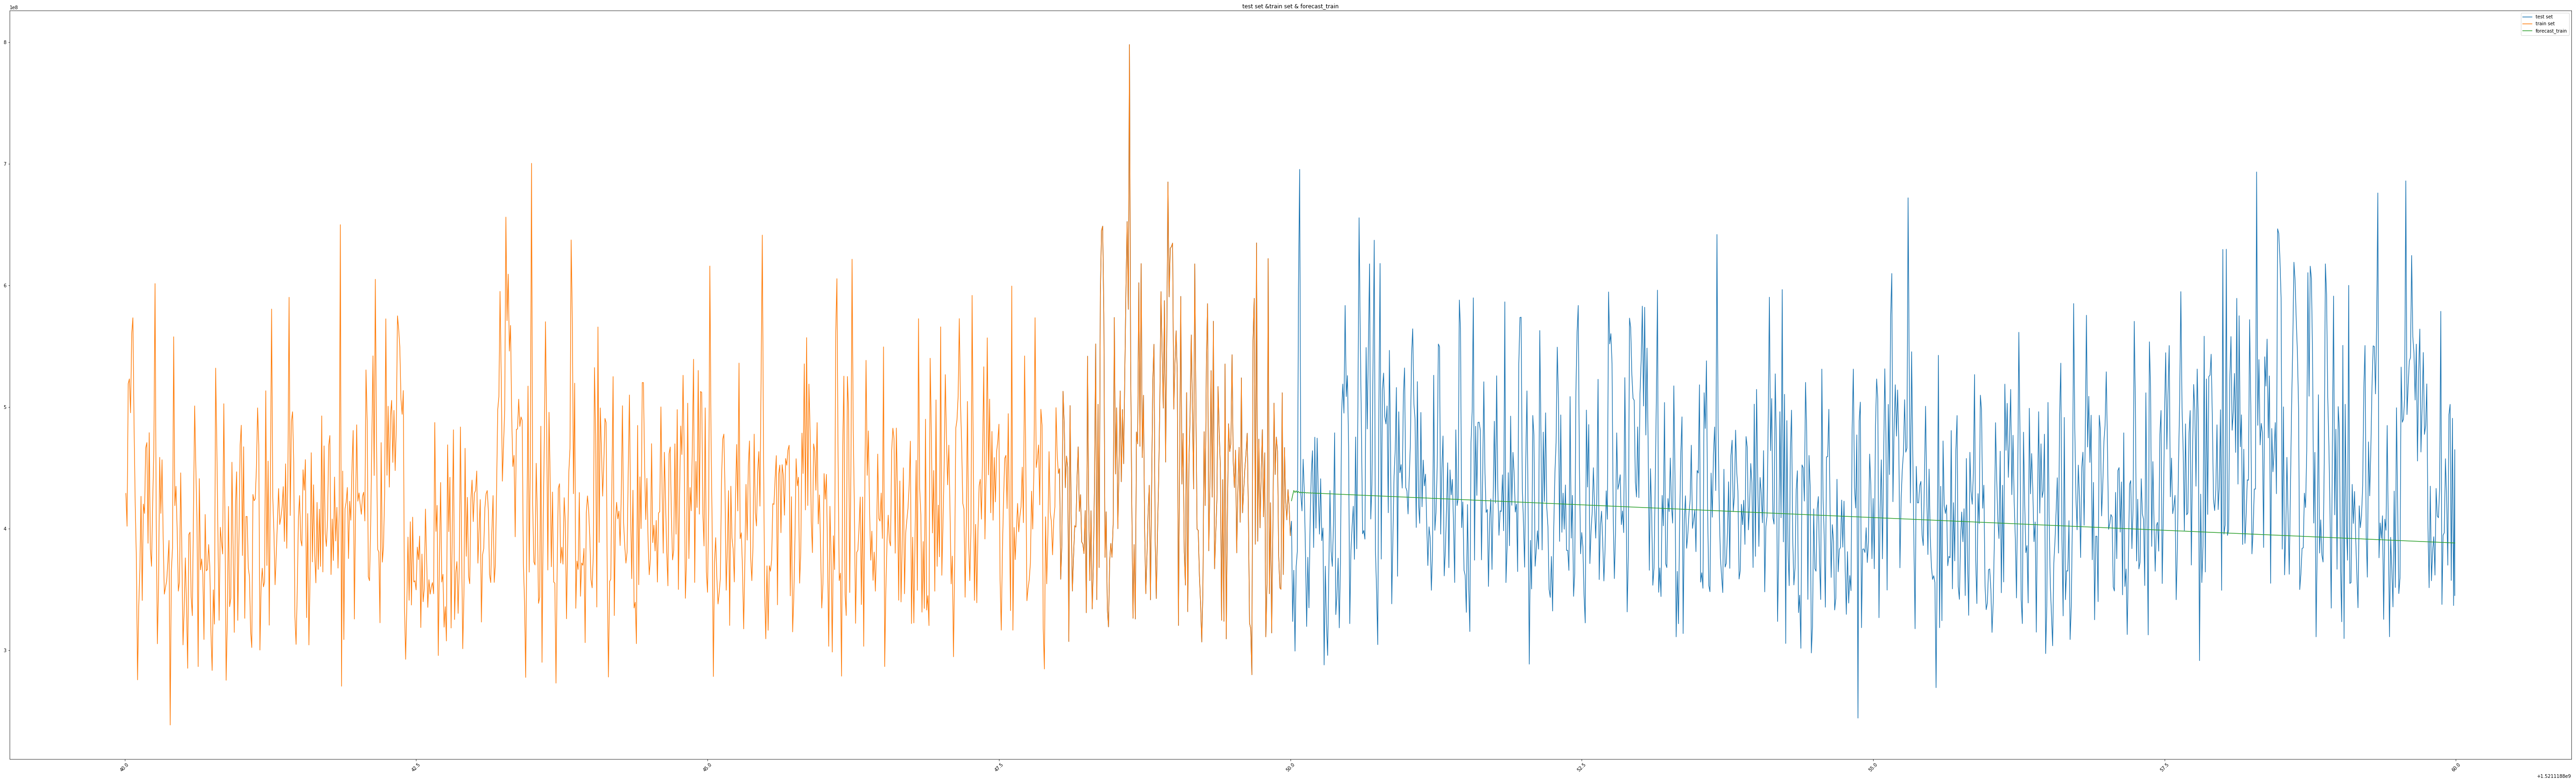

In [79]:
plt.figure(figsize=(100, 30))
plt.xticks(rotation=45)

plt.plot(data_test)
plt.plot(data_train.iloc[4000:])
plt.plot(forecast_train)
plt.legend(["test set","train set","forecast_train"],loc="best")
plt.title("test set &train set & forecast_train")
plt.savefig("test set &train set & forecast_train")

In [70]:
'''
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.predict.html#statsmodels.tsa.arima_model.ARIMA.predict

statsmodels.tsa.arima_model.ARIMA.predict

dynamic bool, optional
The dynamic keyword affects in-sample prediction. 
If dynamic is False, then the in-sample lagged values are used for prediction.
If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables. 
The first forecasted value is start.

'''

'\nhttps://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.predict.html#statsmodels.tsa.arima_model.ARIMA.predict\n\nstatsmodels.tsa.arima_model.ARIMA.predict\n\ndynamic bool, optional\nThe dynamic keyword affects in-sample prediction. \nIf dynamic is False, then the in-sample lagged values are used for prediction.\nIf dynamic is True, then in-sample forecasts are used in place of lagged dependent variables. \nThe first forecasted value is start.\n\n'

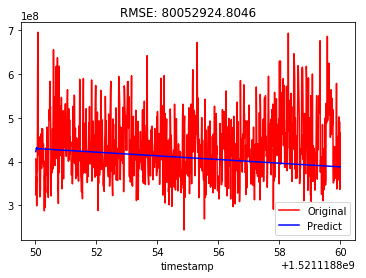

In [80]:
ori=data[list(forecast_train.index)]
ori.plot(color='red', label='Original')  # 过滤没有预测的记录plt.figure(facecolor='white')
forecast_train.plot(color='blue', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((ori-forecast_train)**2)/forecast_train.size))
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x1e8f1a8a978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e8f8460f98>)

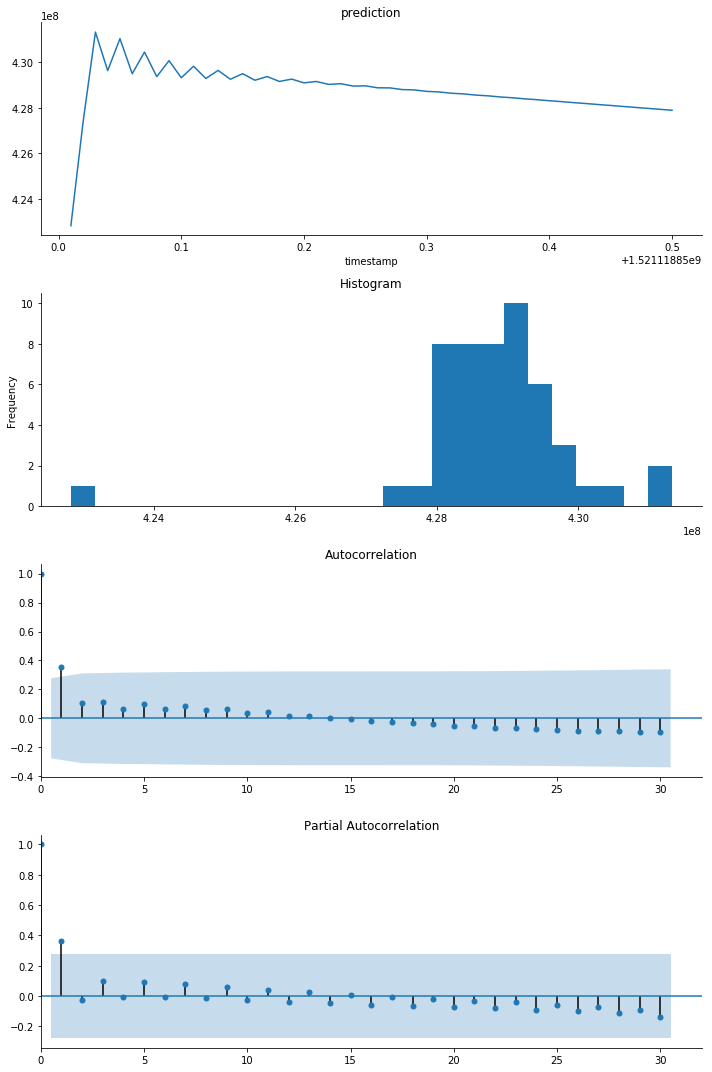

In [86]:
tsplot(forecast_train.iloc[0:50],title="prediction",lags=30)

(<matplotlib.axes._subplots.AxesSubplot at 0x1e8e2081dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e8e4242940>)

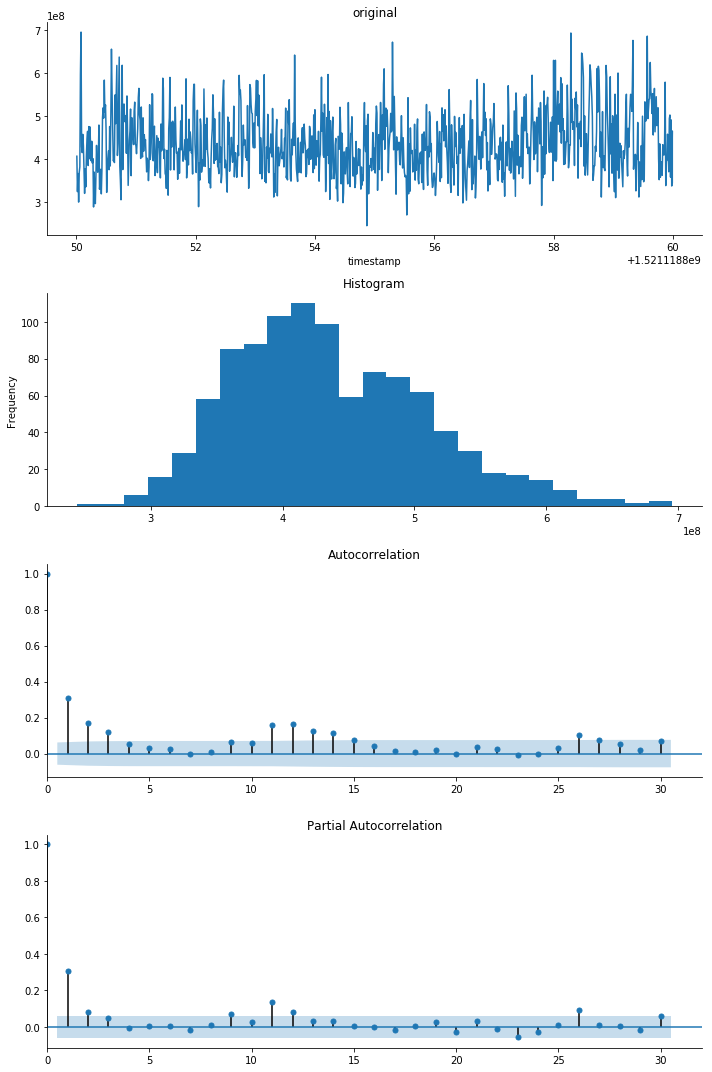

In [31]:
tsplot(ori,title="original",lags=30)

In [32]:
ori.mean(),forecast_train.mean()

(435842163.4730539, 440628483.15868616)

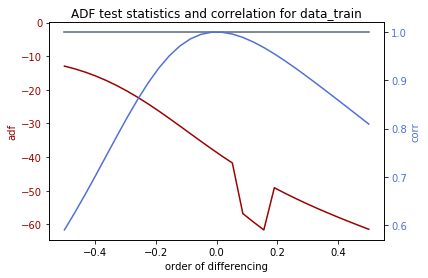

order        adf      corr        5%
0  -0.500000 -12.937335  0.590257 -2.862118
1  -0.465517 -13.759435  0.626468 -2.862118
2  -0.431034 -14.745380  0.664533 -2.862118
3  -0.396552 -15.902099  0.704007 -2.862118
4  -0.362069 -17.233396  0.744266 -2.862118
5  -0.327586 -18.739147  0.784513 -2.862118
6  -0.293103 -20.414410  0.823794 -2.862118
7  -0.258621 -22.248619  0.861064 -2.862118
8  -0.224138 -24.225061  0.895268 -2.862118
9  -0.189655 -26.320871  0.925446 -2.862118
10 -0.155172 -28.507741  0.950840 -2.862118
11 -0.120690 -30.753419  0.970967 -2.862118
12 -0.086207 -33.023880  0.985658 -2.862118
13 -0.051724 -35.285886  0.995037 -2.862118
14 -0.017241 -37.509490  0.999473 -2.862118
15  0.017241 -39.670052  0.999499 -2.862118
16  0.051724 -41.749441  0.995733 -2.862118
17  0.086207 -56.800426  0.988810 -2.862118
18  0.120690 -59.285757  0.979329 -2.862118
19  0.155172 -61.661413  0.967828 -2.862118
20  0.189655 -49.116891  0.954763 -2.862118
21  0.224138 -50.729520  0.940514 -2.862118
22  0.258621 -52.263885  0.925385 -2.862118
23  0.293103 -53.728576  0.909615 -2.862118
24  0.327586 -55.131981  0.893391 -2.862118
25  0.362069 -56.481866  0.876855 -2.862118
26  0.396552 -57.785140  0.860116 -2.862118
27  0.431034 -59.047775  0.843257 -2.862118
28  0.465517 -60.274812  0.826342 -2.862118
29  0.500000 -61.470438  0.809419 -2.862118

In [38]:
fd.MemoryVsCorr(series=data_train, dRange=[-0.5,0.5], numberPlots=30, lag_cutoff=30, seriesName="data_train")

In [5]:
# d=0.155172


data_train_diff0p1=fd.ts_differencing(series=data_train, order=0.155172, lag_cutoff=30)
# fd.ts_cumsum(series=data_train, order=0.155172, lag_cutoff=30)


[1, 2, 3, 4]
[1, 2, 3, 4]
[1, [2, 3, 4]]


In [44]:
data_train.iloc[100],data_train_diff0p1.iloc[100]

(461269900.0, 247755663.76362976)

(<matplotlib.axes._subplots.AxesSubplot at 0x1e8ebb17780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e8ec3f02b0>)

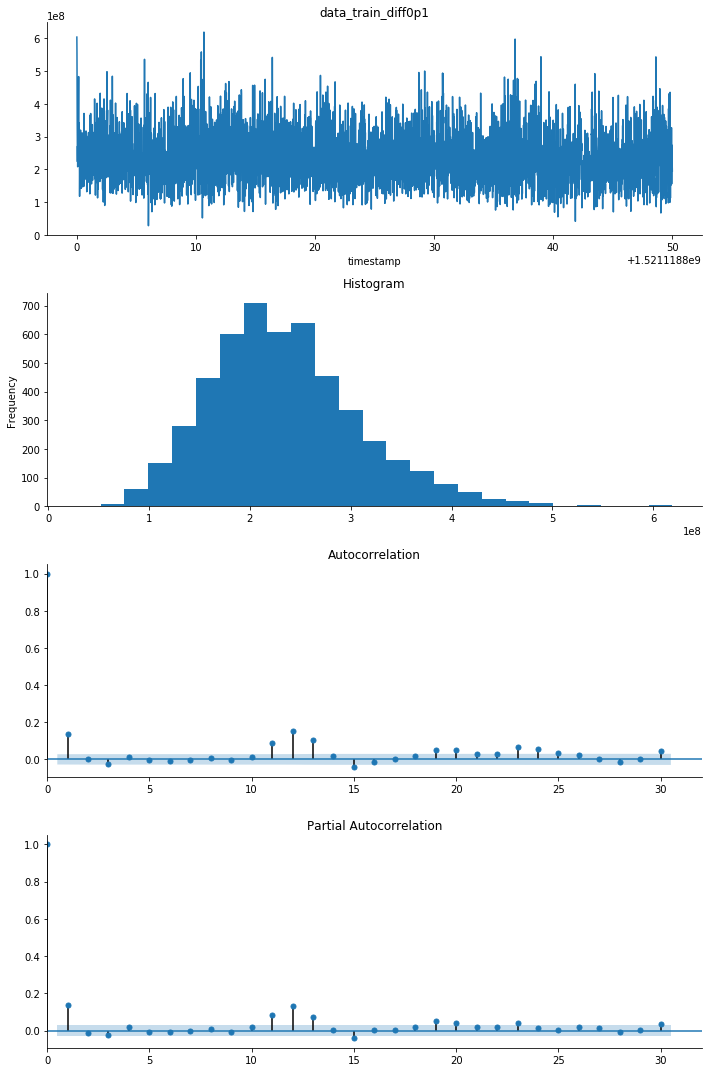

In [45]:

tsplot(data_train_diff0p1,title="data_train_diff0p1",lags=30)

In [97]:
arima1 = ARIMA(data_train_diff0p1, order=(1,0,1))
model_results = arima1.fit()

c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [58]:
pred_train=model_results.predict(start=4000,end=6000,dynamic=True)
pred_train.index=data.index[3999:6000]

c:\users\zijun\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x1e8ebfc6240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e8eabef400>)

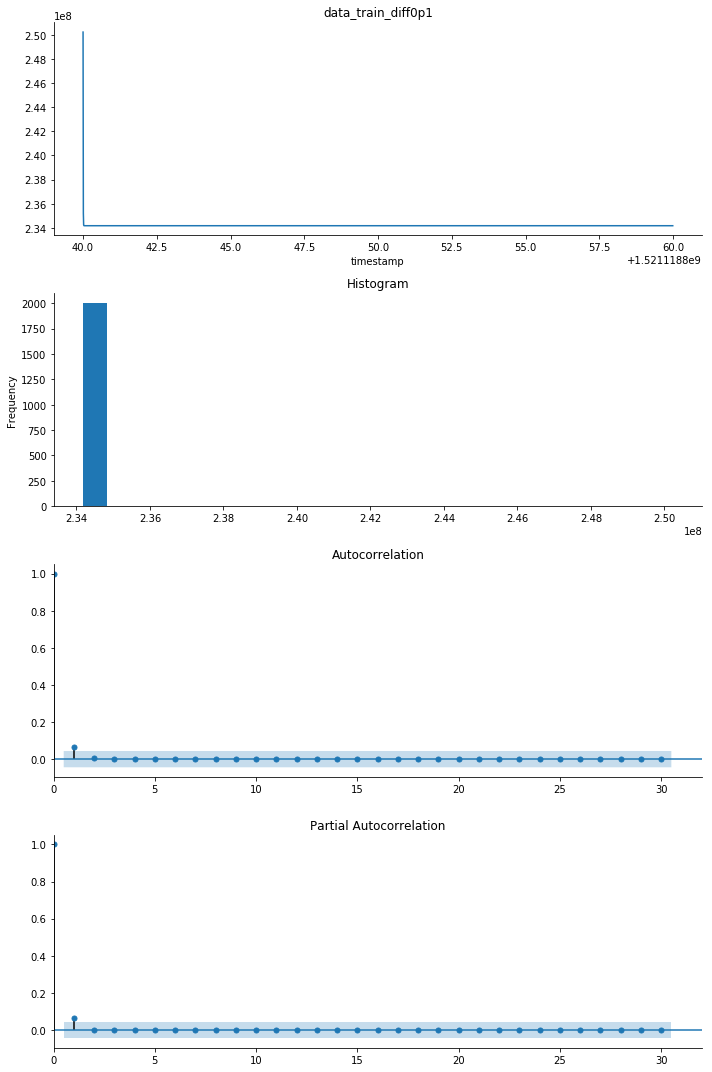

In [59]:
tsplot(pred_train,title="data_train_diff0p1",lags=30)